In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from tensorflow.keras.utils import plot_model
import numpy as np

In [2]:
import numpy as np
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape) # (60000, 28, 28)

# train set / data 
x_train = np.expand_dims(x_train, axis=-1)
x_train = tf.image.resize(x_train, [227,227]) # if we want to resize 

x_test = np.expand_dims(x_test, axis=-1)
x_test = tf.image.resize(x_test, [227,227])

print(x_train.shape) # (60000, 32, 32, 1)
print(x_test.shape)

(60000, 28, 28)
(60000, 227, 227, 1)
(10000, 227, 227, 1)


In [3]:
def VGG_block1(input,filters):
  x = layers.Conv2D(filters=filters,kernel_size=3,strides=1,activation='relu')(input)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(filters=filters,kernel_size=3,strides=1,activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(pool_size=2,strides=2,padding='same')(x)

  return x

def VGG_block2(input,filters):
  x = layers.Conv2D(filters=filters,kernel_size=3,strides=1,activation='relu')(input)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(filters=filters,kernel_size=3,strides=1,activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(filters=filters,kernel_size=3,strides=1,activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(pool_size=2,strides=2,padding='same')(x)
  return x

In [4]:
def VGG16():

  input_shape = (227,227,1)
  input = layers.Input(shape=input_shape)

  x = VGG_block1(input,filters=64)
  x = VGG_block1(x,filters=128)
  x = VGG_block2(x,filters=256)
  x = VGG_block2(x,filters=512)
  x = VGG_block2(x,filters=512)

  x = layers.Flatten()(x)
  x = layers.Dense(4096,activation='relu')(x)
  #x = layers.Dropout(0.5)(x)
  x = layers.Dense(4096,activation='relu')(x)
  #x = layers.Dropout(0.5)(x)
  x = layers.Dense(10,activation='softmax')(x)

  return models.Model(input,x,name='VGG16')

In [5]:
vgg16 = VGG16()
vgg16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 225, 225, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 225, 225, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 223, 223, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 223, 223, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0     

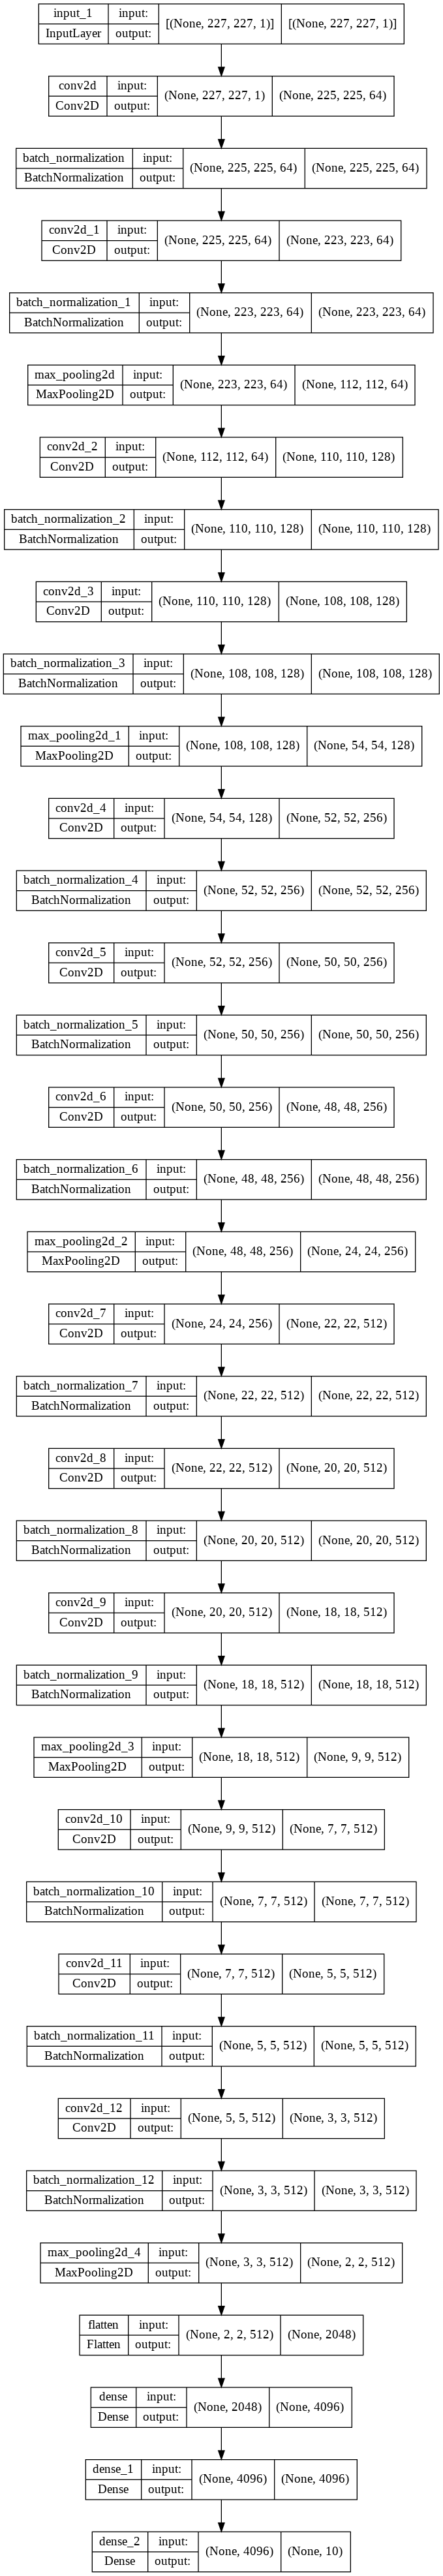

In [6]:
plot_model(vgg16,show_shapes=True)

In [7]:
vgg16.compile(optimizer=keras.optimizers.SGD(lr=0.01,momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_vgg16 = vgg16.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 408s 215ms/step - loss: 0.1176 - accuracy: 0.9652
Epoch 2/10
1875/1875 [==============================] - 404s 215ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 3/10
1875/1875 [==============================] - 404s 215ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 4/10
1875/1875 [==============================] - 404s 215ms/step - loss: 0.0146 - accuracy: 0.9954
Epoch 5/10
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 6/10
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0074 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 

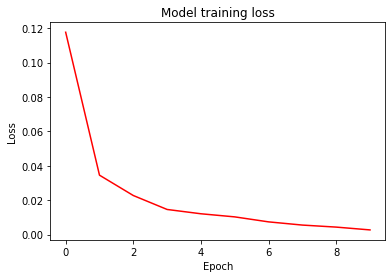

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_vgg16.history['loss'], 'r')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

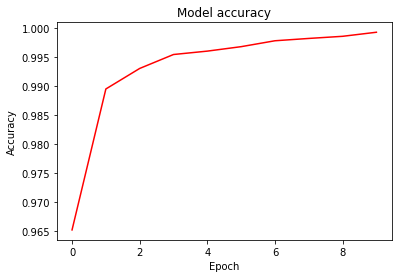

In [9]:
plt.plot(history_vgg16.history['accuracy'], 'r')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()